In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%aimport src

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

from src.operators import MeasurementOperator, RadialSampling, SpiderSampling, SpiderSampling2, solver, MeasurementOperatorDiscrete

imshow_kwargs = {"cmap":'afmhot', "origin":'lower'}

Failed to import NUDFT_cupy (experimental). Use NUDFT() instead. 


In [4]:
x_true = fits.getdata("../data/M51.fits")

In [5]:
Nd=(256,256) # input image size 
Kd=(512,512) # oversampled k-space size
Jd=(6,6) # interpolation kernel size

vis = SpiderSampling2() # using Duncan et al. configuration

op_nufft = MeasurementOperator(vis, Nd, Kd, Jd) # non-uniform
op_discrete = MeasurementOperatorDiscrete(vis, Nd, Kd) # nearest gridpoint

## Point Spread Functions

Text(0.5, 1.0, 'PSF (DFT)')

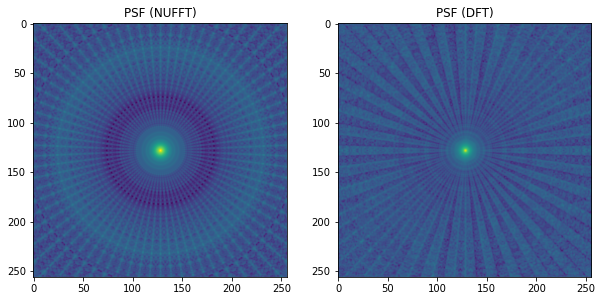

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

psf_nufft = op_nufft.adj_op(np.ones(len(vis))).real
psf_discrete = op_discrete.adj_op(np.ones(Kd))

ax0 = ax[0].imshow(np.log(psf_nufft + 0.001))
lim = ax0.get_clim()
ax[1].imshow(np.log(psf_discrete + 0.001), vmin=lim[0], vmax=lim[1])

ax[0].set_title("PSF (NUFFT)")
ax[1].set_title("PSF (DFT)")

## Dirty images

Text(0.5, 1.0, 'Dirty image (DFT)')

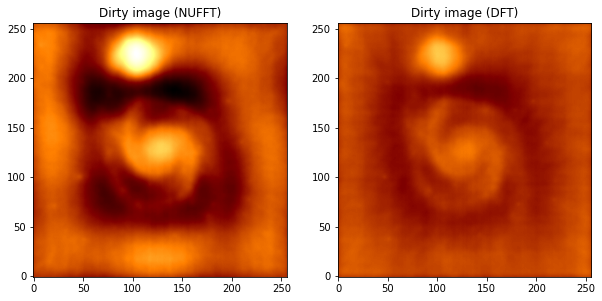

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax0 = ax[0].imshow(op_nufft.self_adj(x_true), **imshow_kwargs)
lim = ax0.get_clim()
ax[1].imshow(op_discrete.self_adj(x_true), vmin=lim[0], vmax=lim[1], **imshow_kwargs)

ax[0].set_title("Dirty image (NUFFT)")
ax[1].set_title("Dirty image (DFT)")


## solving nearest gridpoint case

In [122]:
y = op_discrete.dir_op(x_true) # measurementsresult = solver(y, op_discrete) # solver is hardcoded for now

2021-02-18 11:53:21,155 - Optimus Primal - INFO - Starting Power method
2021-02-18 11:53:21,230 - Optimus Primal - INFO - [Power Method] iter = 1, tol = 0.0
2021-02-18 11:53:21,630 - Optimus Primal - INFO - [Power Method] iter = 11, tol = 0.0
2021-02-18 11:53:21,938 - Optimus Primal - INFO - [Power Method] iter = 21, tol = 0.0
2021-02-18 11:53:22,484 - Optimus Primal - INFO - [Power Method] Converged with iter = 30, tol = 0.0009722770383546352
2021-02-18 11:53:22,639 - Optimus Primal - INFO - Running Forward Backward Primal Dual
2021-02-18 11:53:22,752 - Optimus Primal - INFO - [Primal Dual] 0 out of 5000 iterations, tol = 0.000000
2021-02-18 11:53:30,507 - Optimus Primal - INFO - [Primal Dual] 50 out of 5000 iterations, tol = 0.023937
2021-02-18 11:53:37,855 - Optimus Primal - INFO - [Primal Dual] 100 out of 5000 iterations, tol = 0.016637
2021-02-18 11:53:45,313 - Optimus Primal - INFO - [Primal Dual] 150 out of 5000 iterations, tol = 0.016309
2021-02-18 11:53:52,831 - Optimus Primal

Text(0.5, 1.0, 'Residuals (RMSE:2.5189e+02)')

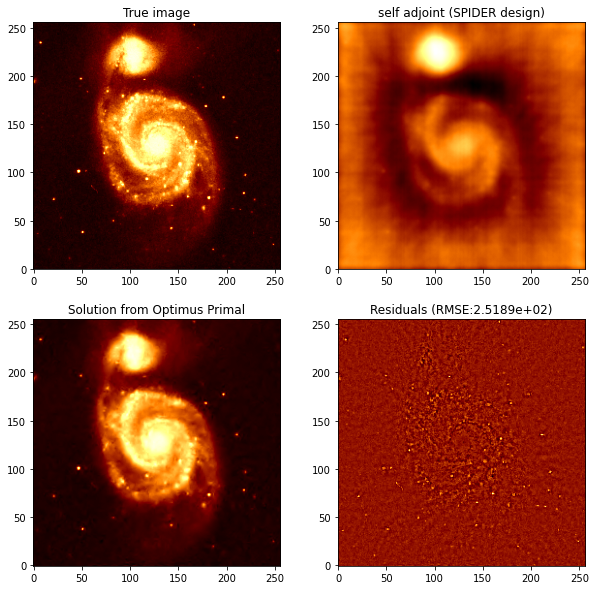

In [130]:

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
a = ax[0,0].imshow(x_true, **imshow_kwargs)
ax[0,0].set_title("True image")

lim = a.get_clim()

ax[0,1].imshow(op_discrete.self_adj(x_true).real, **imshow_kwargs)
ax[0,1].set_title("self adjoint (SPIDER design)")

ax[1,0].imshow(result.real, vmin=lim[0], vmax=lim[1], **imshow_kwargs)
ax[1,0].set_title("Solution from Optimus Primal")

ax[1,1].imshow(x_true - result.real, **imshow_kwargs)
ax[1,1].set_title(f"Residuals (RMSE:{np.sqrt(np.mean(np.square(x_true - result.real))):.4e})")


## solving non-uniform case

In [127]:
y = op_nufft.dir_op(x_true) # measurements
result2 = solver(y, op_nufft) # solver is hardcoded for n

2021-02-18 12:05:53,405 - Optimus Primal - INFO - Starting Power method
2021-02-18 12:05:53,449 - Optimus Primal - INFO - [Power Method] iter = 1, tol = 0.0
2021-02-18 12:05:53,644 - Optimus Primal - INFO - [Power Method] iter = 11, tol = 0.0
2021-02-18 12:05:53,838 - Optimus Primal - INFO - [Power Method] iter = 21, tol = 0.0
2021-02-18 12:05:53,961 - Optimus Primal - INFO - [Power Method] Converged with iter = 27, tol = 0.00096770056
2021-02-18 12:05:54,050 - Optimus Primal - INFO - Running Forward Backward Primal Dual
2021-02-18 12:05:54,158 - Optimus Primal - INFO - [Primal Dual] 0 out of 5000 iterations, tol = 0.000000
2021-02-18 12:05:59,526 - Optimus Primal - INFO - [Primal Dual] 50 out of 5000 iterations, tol = 0.016217
2021-02-18 12:06:04,927 - Optimus Primal - INFO - [Primal Dual] 100 out of 5000 iterations, tol = 0.015820
2021-02-18 12:06:10,271 - Optimus Primal - INFO - [Primal Dual] 150 out of 5000 iterations, tol = 0.009716
2021-02-18 12:06:15,590 - Optimus Primal - INFO 

Text(0.5, 1.0, 'Residuals (RMSE:1.4373e+03)')

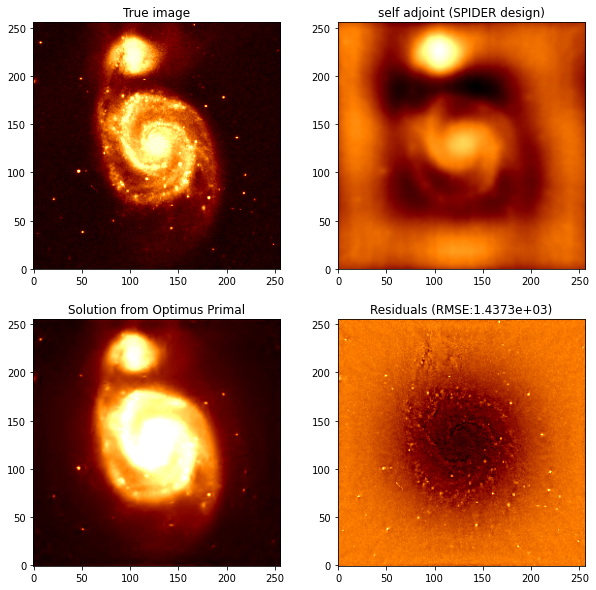

In [131]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
a = ax[0,0].imshow(x_true, **imshow_kwargs)
ax[0,0].set_title("True image")

lim = a.get_clim()

ax[0,1].imshow(op_nufft.self_adj(x_true).real, **imshow_kwargs)
ax[0,1].set_title("self adjoint (SPIDER design)")

ax[1,0].imshow(result2.real, vmin=lim[0], vmax=lim[1], **imshow_kwargs)
ax[1,0].set_title("Solution from Optimus Primal")

ax[1,1].imshow(x_true - result2.real, **imshow_kwargs)
ax[1,1].set_title(f"Residuals (RMSE:{np.sqrt(np.mean(np.square(x_true - result2.real))):.4e})")
